<a href="https://colab.research.google.com/github/muradhassen/Python_AI/blob/master/spamEmail1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!mkdir -p ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [3]:
#!/bin/bash
!kaggle datasets download ashfakyeafi/spam-email-classification

Dataset URL: https://www.kaggle.com/datasets/ashfakyeafi/spam-email-classification
License(s): apache-2.0
  0% 0.00/207k [00:00<?, ?B/s]
100% 207k/207k [00:00<00:00, 508MB/s]


In [5]:
import zipfile
zipref = zipfile.ZipFile('/content/spam-email-classification.zip', 'r')
zipref.extractall()
zipref.close()

In [75]:
#this block is only use for importing neccessery libaray
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#using plotly
import plotly.express as px
#using wordcloud
from wordcloud import WordCloud
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB





In [10]:
df = pd.read_csv('/content/email.csv')

In [13]:
df.head()
df.shape
df.columns

Index(['Category', 'Message'], dtype='object')

In [16]:
df.duplicated().sum()

np.int64(0)

In [18]:
df.drop_duplicates(inplace=True)

In [19]:
df.isnull().sum()

,0
Category,0
Message,0


In [25]:
df = df[df['Category'].isin(['ham','spam'])]
labels_count = df['Category'].value_counts()

In [35]:

fix = px.pie(df , values=labels_count.values , names=labels_count.index , color_discrete_sequence=px.colors.qualitative.Set3 , title='ham & spam')
fix.show()

In [38]:

def plot_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

In [43]:
Ham_Mail = ''.join(df[df['Category']=='ham']['Message'])

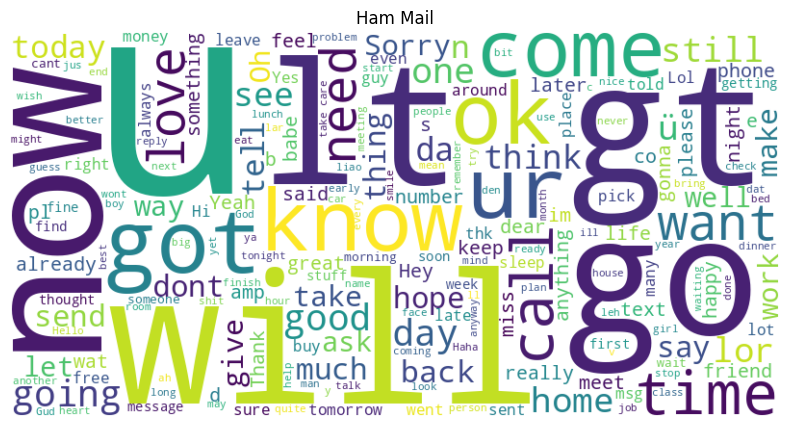

In [44]:
plot_wordcloud(Ham_Mail , 'Ham Mail') ;

In [46]:
X = df['Message']  ;
y = df['Category'] ;

In [48]:
X.head()

,Message
0,"Go until jurong point, crazy.. Available only ..."
1,Ok lar... Joking wif u oni...
2,Free entry in 2 a wkly comp to win FA Cup fina...
3,U dun say so early hor... U c already then say...
4,"Nah I don't think he goes to usf, he lives aro..."


In [50]:
le = LabelEncoder()


In [54]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [57]:
X_train.shape , y_train.shape

((3455,), (3455,))

In [60]:
#encoding part
y_train = le.fit_transform(y_train) ;
y_train

array([0, 0, 0, ..., 0, 0, 0])

In [73]:
vectorize = CountVectorizer()

In [74]:
X_train = vectorize.fit_transform(X_train)

AttributeError: 'csr_matrix' object has no attribute 'lower'

In [76]:
#night base
model = MultinomialNB()

In [77]:
model.fit(X_train , y_train)

MultinomialNB()

In [79]:
model.score(X_train , y_train)

0.993342981186686

In [80]:
model.score(X_test , y_test)

ValueError: could not convert string to float: 'Also sir, i sent you an email about how to log into the usc payment portal. I.ll send you another message that should explain how things are back home. Have a great weekend.'